In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Графики априорного распределения для схемы испытаний Бернулли

В качестве априорного распределения возьмем $B(\alpha, \beta)$ (сопряженное к $Bin(m, p)$, где $m = 1$).

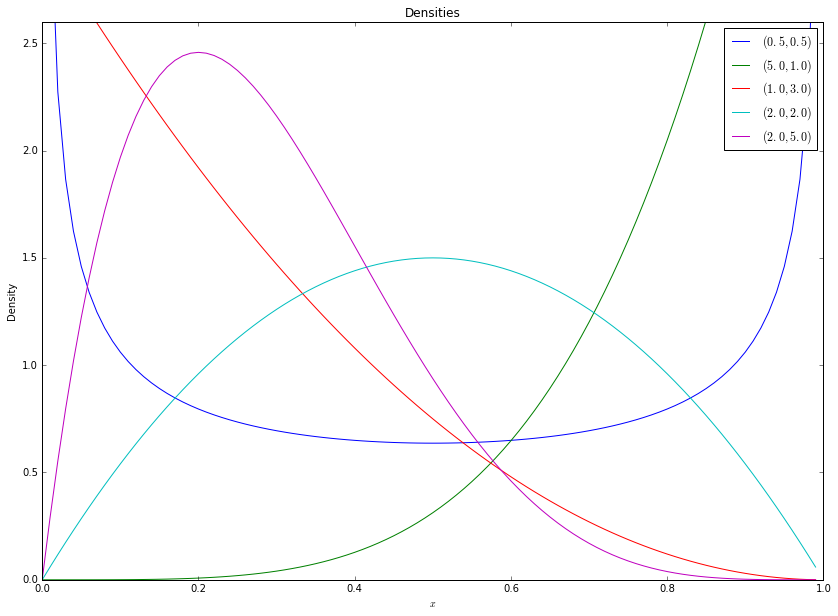

In [2]:
plt.figure(figsize=(14, 10))

define = np.arange(0,1, 0.01)
options = np.array([(0.5, 0.5), (5, 1), (1, 3), (2, 2), (2, 5)])

for i in xrange(options.size/2):
    plt.plot(define, sts.beta.pdf(define, options[i][0], options[i][1]),\
             label = '$(' + str(options[i][0]) + ', ' + str(options[i][1]) + ')$')


plt.ylim(0, 2.6)
plt.ylabel('Density')
plt.xlabel('$x$')
plt.title('Densities')
plt.legend()

plt.show()

### Анализ графика

При параметрах (0.5, 0.5) монета скорей всего не честная.

При параметрах (5, 1) наиболее вероятно выпадение орла.

При параметрах (1, 3) и (2, 5) наиболее вероятно выпадение решки.

При параметрах (2, 2) монета честная.

## Выборки размера 20 для различных $p$

In [3]:
amount_of_sample = 5
size_of_one_sample = 20
p = np.zeros(amount_of_sample)

for i in xrange(amount_of_sample):
    p[i] = sts.beta.rvs(sts.uniform.rvs(size=1, loc=0, scale=10), sts.uniform.rvs(size=1, loc=0, scale=10), size=1)

In [4]:
print p

[ 0.39727778  0.22404747  0.22634543  0.56008997  0.78247759]


20 бросков для каждого значения $p$

In [5]:
sample = np.zeros(size_of_one_sample * amount_of_sample).reshape(amount_of_sample, size_of_one_sample)

for i in xrange(amount_of_sample):
    sample[i] = np.array(sts.bernoulli.rvs(p[i], size = size_of_one_sample))

In [6]:
print sample

[[ 1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.
   0.  1.]
 [ 0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.
   0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.
   1.  1.]]


## Байесовские оценки при различных параметрах априорного распределения и ОМП для параметра $p$

In [7]:
def bayesian_estimation(sample, alpha, beta):
    conditional_expectation = (np.sum(sample) + float(alpha))/(sample.size + alpha + beta)
    return conditional_expectation

In [8]:
def omp_func(sample):
    return np.mean(sample)

In [9]:
def values_of_estimations(sample, options, amount_of_sample, size_of_one_sample):
    omp = np.zeros_like(sample).reshape(amount_of_sample, size_of_one_sample)
    bayesian_ests = np.zeros(sample.size*options.size/2).reshape(amount_of_sample, options.size/2, size_of_one_sample)
    for i in xrange(amount_of_sample):
        for j in xrange(size_of_one_sample):
            omp[i][j] = omp_func(sample[i][:j+1])
            
            for k in xrange(options.size/2):
                bayesian_ests[i][k][j] = bayesian_estimation(sample[i][:j+1], options[k][0], options[k][1])
    
    return omp, bayesian_ests

In [10]:
def plot_graphics(sample, options, p, amount_of_sample, size_of_one_sample):
    
    if((sample.size != amount_of_sample * size_of_one_sample) | (p.size != amount_of_sample)):
        return
    
    plt.figure(figsize=(14, 7 * amount_of_sample))
    
    n = np.arange(size_of_one_sample)
    omp, bayesian_ests = values_of_estimations(sample, options, amount_of_sample, size_of_one_sample)
    
    for i in xrange(amount_of_sample):
        plt.subplot(amount_of_sample, 1, i + 1)
        
        plt.plot(n, np.abs(omp[i] - p[i]), label = 'OMP')

        for k in xrange(options.size/2):
            plt.plot(n, np.abs(bayesian_ests[i][k] - p[i]), \
                     label = '$(' + str(options[k][0]) + ', ' + str(options[k][1]) + ')$')

        plt.ylim(0, 1)
        plt.ylabel('Estimation')
        plt.xlabel('$n$')
        plt.title('Estimations for $p = ' + str(p[i]) + '$')
        plt.legend()

    plt.show()

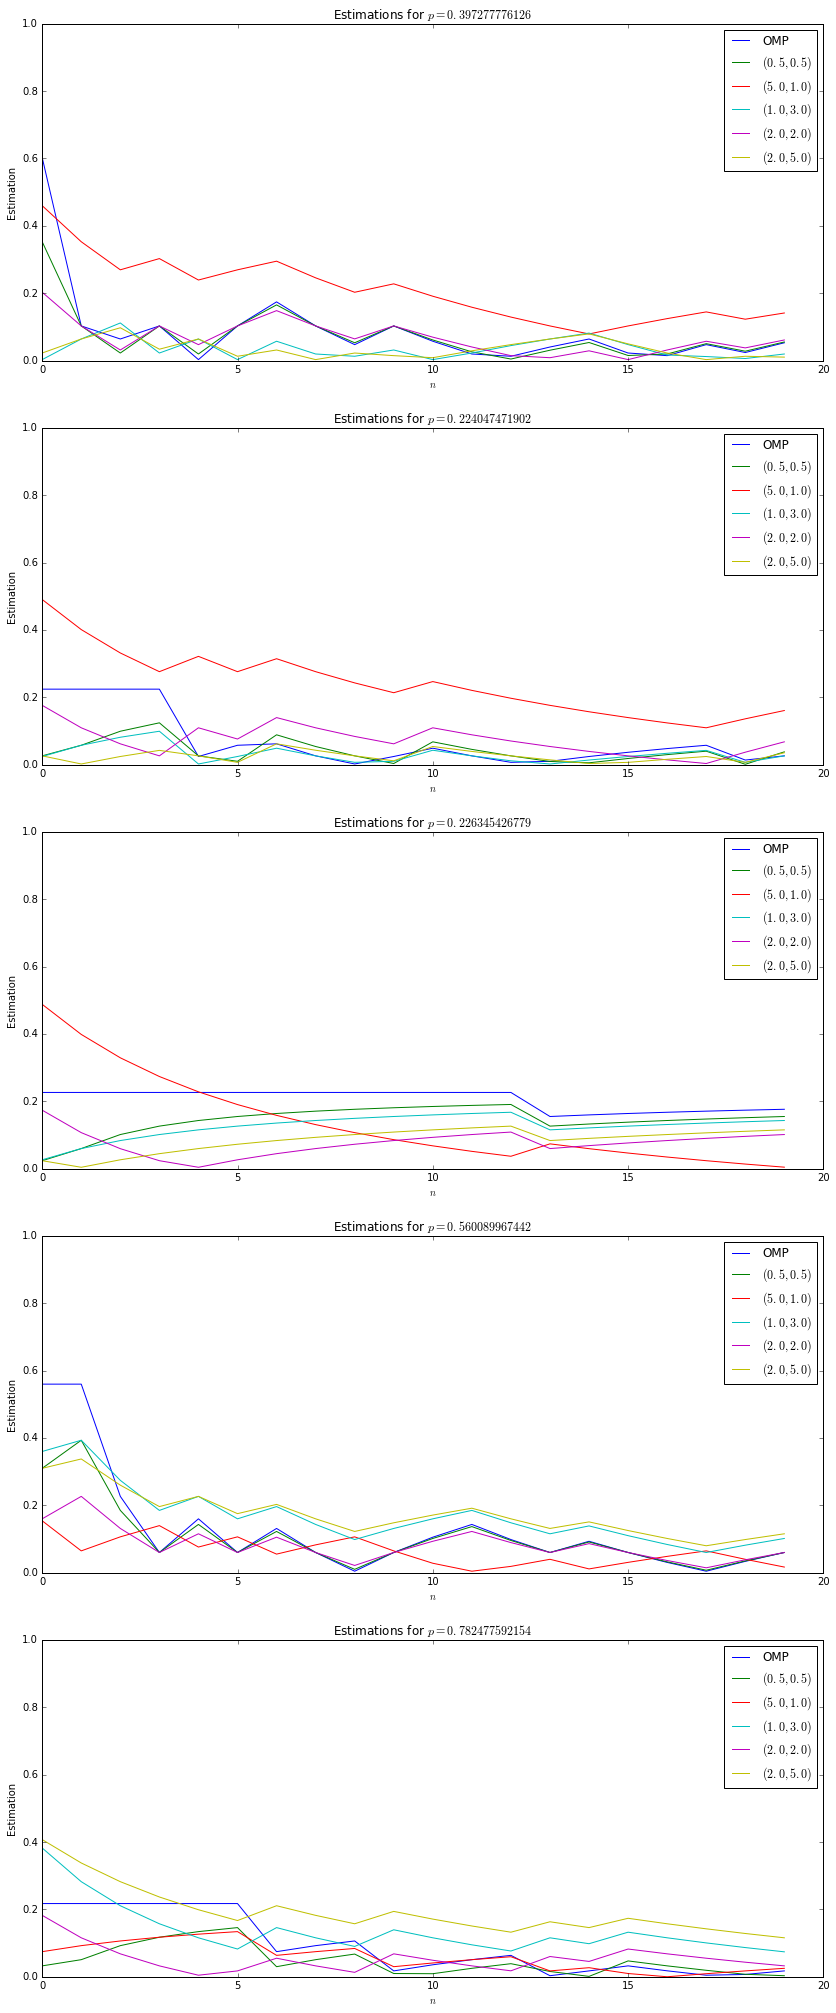

In [11]:
plot_graphics(sample, options, p, amount_of_sample, size_of_one_sample)

## Вывод

Байесовская оценка тем точнее чем больше плотность априорного распределения сосредоточена у оцениваемого значения параметра $p$. Т.е. честную вероятность(~0.5) точнее всего оценивает баесовская оценка с такими параметрами, что плотность априорного распределения возрастает при приближении к 0.5 и убывает при удалении от этого значения. Смещеные в определенную сторону $р$ точнее определяет оценка, у которого плотность в этой области максимальна.
Таким образом, если мы заранее знаем, что монетка у нас скорей всего честная, то лучше выбирать в качестве параметров априорного распределения такие, при которых плотность сосредоточена около значения 0.5 и наооборот.